In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset/nsw-property-sales-data-updated20250922.csv')

In [4]:
df.head()

,Property ID,Sale counter,Download date / time,Property name,Property unit number,Property house number,Property street name,Property locality,Property post code,Area,Area type,Contract date,Settlement date,Purchase price,Zoning,Nature of property,Primary purpose,Strata lot number,Dealing number,Property legal description
0,3379176.0,1,20240701 01:16,Cams,NaN,154,Sanctuary Rd,Ellalong,2325.0,314100.0,H,2024-06-19,2024-06-25,1800000,RU2,V,Vacant land,NaN,AU186093,1/185087
1,3484622.0,2,20240701 01:16,NaN,NaN,8 A,Redgum Rd,Paxton,2325.0,5280.0,M,2024-05-20,2024-06-27,1150000,R5,R,Residence,NaN,AU194908,31/1144473
2,4140910.0,3,20240701 01:16,NaN,NaN,46,Millbrook Rd,Cliftleigh,2321.0,450.0,M,2024-05-29,2024-06-26,710000,R2,R,Residence,NaN,AU189616,614/1242604
3,1884.0,4,20240701 01:16,NaN,NaN,12,Vincent St,Cessnock,2325.0,1100.0,M,2024-05-14,2024-06-25,1250000,E2,3,Commercial,NaN,AU184079,1/727362
4,4258.0,5,20240701 01:16,NaN,NaN,9,Cessnock Rd,Branxton,2335.0,1113.0,M,2024-04-04,2024-06-27,755000,R3,R,Residence,NaN,AU194943,1/3/8123


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827868 entries, 0 to 1827867
Data columns (total 20 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Property ID                 float64
 1   Sale counter                int64  
 2   Download date / time        object 
 3   Property name               object 
 4   Property unit number        object 
 5   Property house number       object 
 6   Property street name        object 
 7   Property locality           object 
 8   Property post code          float64
 9   Area                        float64
 10  Area type                   object 
 11  Contract date               object 
 12  Settlement date             object 
 13  Purchase price              int64  
 14  Zoning                      object 
 15  Nature of property          object 
 16  Primary purpose             object 
 17  Strata lot number           float64
 18  Dealing number              object 
 19  Property legal descri

In [5]:
df.describe()

,Property ID,Sale counter,Property post code,Area,Purchase price,Strata lot number
count,1.827648e+06,1.827868e+06,1.827737e+06,1.398750e+06,1.827868e+06,685925.000000
mean,2.664583e+06,5.589143e+01,2.346496e+03,1.511844e+05,1.363607e+06,52.924630
std,1.485271e+06,8.455111e+01,2.489838e+02,5.165827e+06,7.962125e+06,81.626436
min,2.000000e+00,1.000000e+00,2.000000e+03,0.000000e+00,1.000000e+02,1.000000
25%,1.328390e+06,1.100000e+01,2.142000e+03,3.035000e+02,5.150000e+05,5.000000
50%,2.739294e+06,3.000000e+01,2.282000e+03,5.890000e+02,7.520000e+05,18.000000
75%,4.163112e+06,6.700000e+01,2.546000e+03,8.764000e+02,1.200000e+06,66.000000
max,6.014845e+06,1.447000e+03,4.385000e+03,2.703300e+09,9.459457e+08,1196.000000


In [16]:
df['Property locality'].unique()[:20]

array(['Ellalong', 'Paxton', 'Cliftleigh', 'Cessnock', 'Branxton',
       'Abermain', 'East Branxton', 'Aberdare', 'Bellbird', 'Pokolbin',
       'Kurri Kurri', 'Pelaw Main', 'Weston', 'Heddon Greta',
       'North Rothbury', 'Quorrobolong', 'Greta', 'Paynes Crossing',
       'Congewai', 'Gresford'], dtype=object)

In [9]:
avg_price_by_locality = (
    df.groupby('Property locality')['Purchase price']
      .mean()
      .reset_index()
      .sort_values('Purchase price', ascending=False)
)

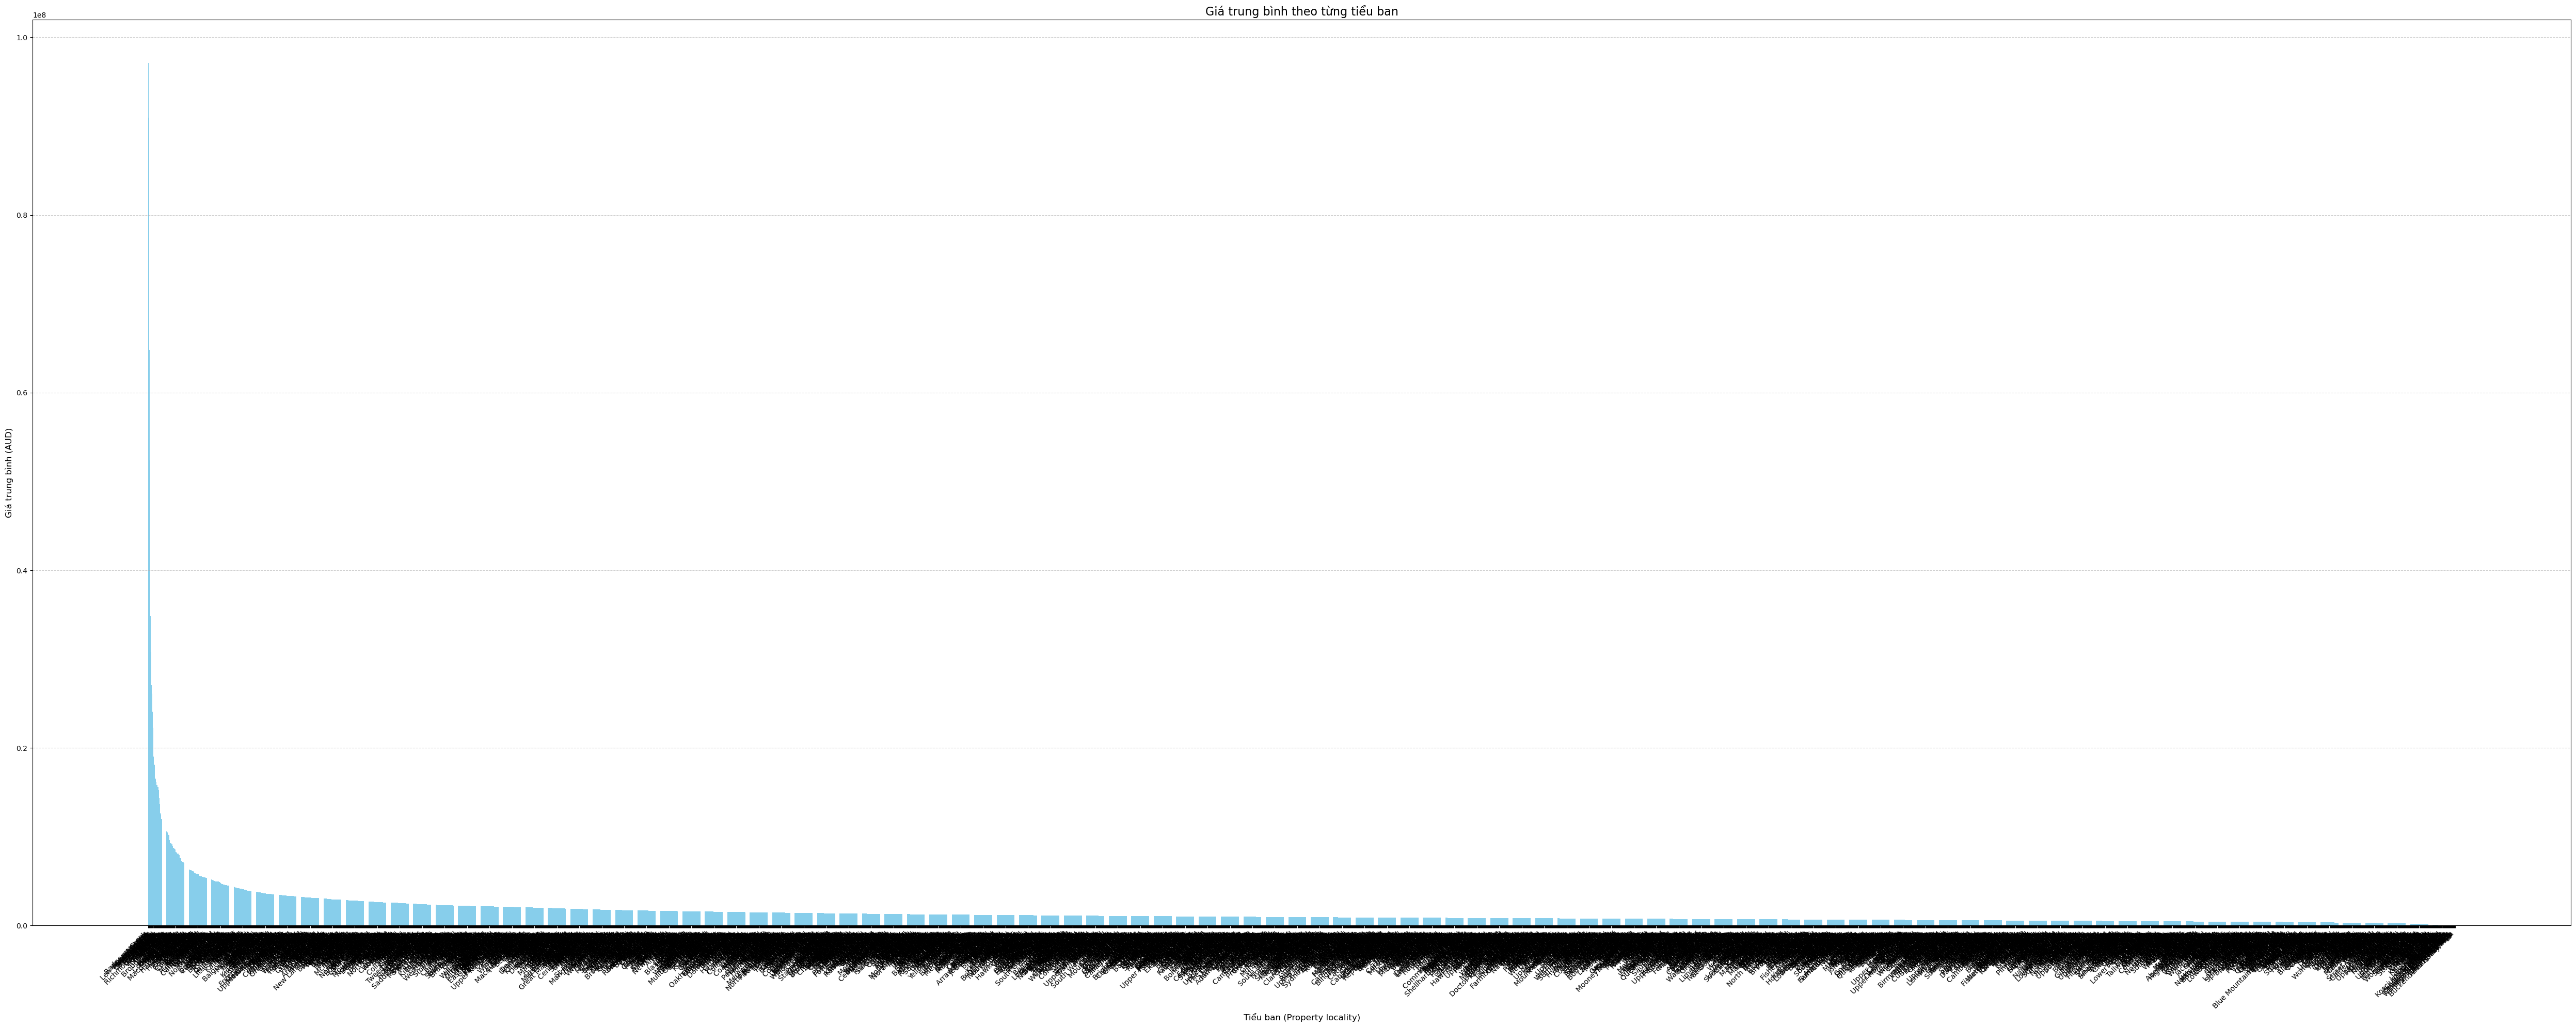

In [10]:
plt.figure(figsize=(50, 20))
plt.bar(avg_price_by_locality['Property locality'], avg_price_by_locality['Purchase price'], color='skyblue')
plt.title('Giá trung bình theo từng tiểu ban', fontsize=16)
plt.xlabel('Tiểu ban (Property locality)', fontsize=12)
plt.ylabel('Giá trung bình (AUD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [4]:
def clean_numberic(x):
    if pd.isna(x):
        return None
    x = x.replace("\n", "").strip()  
    x = re.sub(r"[^\d]", "", x)      
    return float(x) if x.isdigit() else None

In [5]:
cols_to_clean = ["Beds", "Baths", "Parking", "Price", "Size"]

df[cols_to_clean] = df[cols_to_clean].applymap(clean_numberic)
df_sold[cols_to_clean] = df_sold[cols_to_clean].applymap(clean_numberic)

df["Address"] = df["Address"].str.replace("\n", " ").str.strip()
df["Type"] = df["Type"].str.strip()
df_sold["Address"] = df_sold["Address"].str.replace("\n", " ").str.strip()
df_sold["Type"] = df_sold["Type"].str.strip()

C:\Users\quock\AppData\Local\Temp\ipykernel_66308\3424736659.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols_to_clean] = df[cols_to_clean].applymap(clean_numberic)
C:\Users\quock\AppData\Local\Temp\ipykernel_66308\3424736659.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_sold[cols_to_clean] = df_sold[cols_to_clean].applymap(clean_numberic)


In [19]:
df_parsed = df['Address'].apply(parse_address).apply(pd.Series)
df = pd.concat([df, df_parsed], axis=1)

In [7]:
df_parsed = df_sold['Address'].apply(parse_address).apply(pd.Series)
df_sold = pd.concat([df_sold, df_parsed], axis=1)

In [ ]:
df.to_csv('dataset/cleaned/domain_realestate_cleaned.csv', index=False)
df_sold.to_csv('dataset/cleaned/domain_realestate_sold_cleaned.csv', index=False)

In [15]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="house_price_predictor")

def get_lat_lon(address):
    try:
        location = geolocator.geocode(address + ", Australia", timeout=10)
        if location:
            return location.latitude, location.longitude
    except Exception as e:
        print("Error:", e)
    return None, None

In [16]:
df['Address'][:5]

0         8E/47 Herdsman Parade,  WEMBLEY WA 6014
1     Lot 1668 Bushland Crescent,  BANYA QLD 4551
2     Lot 1668 Bushland Crescent,  BANYA QLD 4551
3    Lot 1920 Coochin Court,  WHITE ROCK QLD 4306
4    Lot 1920 Coochin Court,  WHITE ROCK QLD 4306
Name: Address, dtype: object

In [ ]:





latitudes, longitudes = [], []
for addr in df['Address'][:5]:
    lat, lon = get_lat_lon(addr)
    latitudes.append(lat)
    longitudes.append(lon)
    time.sleep(10)  

In [14]:
print([latitudes, longitudes])

[[None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None]]
